In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import bloscpack as bp
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

from registration_utilities import *
from annotation_utilities import *
from vis3d_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for Local Macbook Pro


In [2]:
atlas_name = 'atlasV5'

In [3]:
stack_fixed = 'MD589'
stacks_moving = ['MD585', 'MD594']
warp_setting = 9

In [4]:
ann_vol_bbox_rel2uncropped = DataManager.load_original_volume_bbox(stack=stack_fixed, volume_type='annotation', downscale=32)
print 'annotation volume bbox (rel2uncropped):', ann_vol_bbox_rel2uncropped

annotation volume bbox (rel2uncropped): [ 622 1042  155  502  128  503]


# Compute mean positions

In [4]:
instance_centroids_rel2fixed = defaultdict(list)

# for name_u in ['7N']:
for name_u in all_known_structures:
    print name_u
    
    if name_u in paired_structures:
        lname = convert_to_left_name(name_u)
        rname = convert_to_right_name(name_u)
    else:
        lname = name_u
        rname = name_u
    
    try:
        right_instance_vol = DataManager.load_original_volume(stack=stack_fixed,  downscale=32, volume_type='annotationAsScore', structure=rname)
        right_instance_vol_bbox = np.array(bbox_3d(right_instance_vol))
        right_instance_vol_inbbox = crop_and_pad_volume(right_instance_vol, out_bbox=right_instance_vol_bbox)
        
        instance_centroid_rel2fixed = np.mean(np.nonzero(right_instance_vol_inbbox), axis=1)[[1,0,2]] + right_instance_vol_bbox[[0,2,4]]
        instance_centroids_rel2fixed[rname].append(instance_centroid_rel2fixed)
        
    except Exception as e:
        print e
        continue

    try:
        left_instance_vol = DataManager.load_original_volume(stack=stack_fixed, downscale=32, volume_type='annotationAsScore', structure=lname)
        left_instance_vol_bbox = np.array(bbox_3d(left_instance_vol))
        left_instance_vol_inbbox = crop_and_pad_volume(left_instance_vol, out_bbox=left_instance_vol_bbox)
        
        instance_centroid_rel2fixed = np.mean(np.nonzero(left_instance_vol_inbbox), axis=1)[[1,0,2]] + left_instance_vol_bbox[[0,2,4]]
        instance_centroids_rel2fixed[lname].append(instance_centroid_rel2fixed)

    except Exception as e:
        print e
        continue        

    for stack_moving in stacks_moving:

        try:
            left_instance_vol = DataManager.load_transformed_volume(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                            stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                            warp_setting=warp_setting,
                                                            structure=lname)
            left_instance_vol_bbox_rel2fixed = DataManager.load_transformed_volume_bbox(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                        stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                        warp_setting=warp_setting,
                                                        structure=lname)
            instance_centroid_rel2fixed = np.mean(np.nonzero(left_instance_vol), axis=1)[[1,0,2]] + left_instance_vol_bbox_rel2fixed[[0,2,4]]
            instance_centroids_rel2fixed[lname].append(instance_centroid_rel2fixed)
        except Exception as e:
            print e
            continue 

        try:
            right_instance_vol = DataManager.load_transformed_volume(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                        stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                        warp_setting=warp_setting,
                                                        structure=rname)
            right_instance_vol_bbox_rel2fixed = DataManager.load_transformed_volume_bbox(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                        stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                        warp_setting=warp_setting,
                                                        structure=rname)
            instance_centroid_rel2fixed = np.mean(np.nonzero(right_instance_vol), axis=1)[[1,0,2]] + right_instance_vol_bbox_rel2fixed[[0,2,4]]
            instance_centroids_rel2fixed[rname].append(instance_centroid_rel2fixed)
        except Exception as e:
            print e
            continue 


5N
6N
7N
7n
Amb
LC
LRt
Pn
Tz
VLL
RMC
SNC
SNR
3N
4N
Sp5I
Sp5O
Sp5C
rm -rf "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.bp" "/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.bp"


File does not exist: /home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.bp


[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume/score_volumes/MD585_down32_annotationAsScoreVolume_warp9_MD589_down32_annotationAsScoreVolume_Sp5C_R.bp'
PBG
10N
VCA
VCP
DC
AP
12N
RtTg
sp5
rm -rf "/home/yuncong/CSHL_volumes/MD589/MD589_down32_annotationAsScoreVolume/score_volumes/MD589_down32_annotationAsScoreVolume_sp5.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD589/MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD589/MD589_down32_annotationAsScoreVolume/score_volumes/MD589_down32_annotationAsScoreVolume_sp5.bp" "/home/yuncong/CSHL_volumes/MD589/MD589_down32_annotationAsScoreVolume/score_volumes/MD589_down32_annotationAsScoreVolume_sp5.bp"


File does not exist: /home/yuncong/CSHL_volumes/MD589/MD589_down32_annotationAsScoreVolume/score_volumes/MD589_down32_annotationAsScoreVolume_sp5.bp


[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/MD589/MD589_down32_annotationAsScoreVolume/score_volumes/MD589_down32_annotationAsScoreVolume_sp5.bp'
outerContour
rm -rf "/home/yuncong/CSHL_volumes/MD589/MD589_down32_annotationAsScoreVolume/score_volumes/MD589_down32_annotationAsScoreVolume_outerContour.bp" && mkdir -p "/home/yuncong/CSHL_volumes/MD589/MD589_down32_annotationAsScoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD589/MD589_down32_annotationAsScoreVolume/score_volumes/MD589_down32_annotationAsScoreVolume_outerContour.bp" "/home/yuncong/CSHL_volumes/MD589/MD589_down32_annotationAsScoreVolume/score_volumes/MD589_down32_annotationAsScoreVolume_outerContour.bp"


File does not exist: /home/yuncong/CSHL_volumes/MD589/MD589_down32_annotationAsScoreVolume/score_volumes/MD589_down32_annotationAsScoreVolume_outerContour.bp


[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/MD589/MD589_down32_annotationAsScoreVolume/score_volumes/MD589_down32_annotationAsScoreVolume_outerContour.bp'
SC
IC


In [6]:
instance_centroids_rel2fixed.default_factory = None

In [42]:
fp = DataManager.get_instance_centroids_filepath(atlas_name=atlas_name)
save_pickle(instance_centroids_rel2fixed, fp)
upload_to_s3(fp)

aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_instanceCentroids.pkl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_instanceCentroids.pkl"


## Average the centroids

In [60]:
# fp = DataManager.get_instance_centroids_filepath(atlas_name=atlas_name)
# instance_centroids_rel2fixed = load_pickle(fp)

In [63]:
canonical_locations_rel2canon, canonical_centroid_rel2fixed, canonical_normal = \
average_location(instance_centroids_rel2fixed)

canonical_centroid_rel2uncropped = canonical_centroid_rel2fixed + ann_vol_bbox_rel2uncropped[[0,2,4]]
print 'canonical_centroid_rel2uncropped', canonical_centroid_rel2uncropped

[ 0.04111027 -0.09160432  0.99494653] @ [ 172.0630378   223.21016434  186.74030921]
canonical_centroid_rel2uncropped [ 794.0630378   378.21016434  314.74030921]


In [114]:
canonical_locations_rel2fixed = {k: canonical_centroid_rel2fixed + c for k, c in canonical_locations_rel2canon.iteritems()}

In [64]:
print 'deviation angle:', np.rad2deg(np.arccos(canonical_normal[2]))

deviation angle: 5.76256199381


In [182]:
canonical_midplane_xx, canonical_midplane_yy = np.meshgrid(range(0, 500, 100), range(0, 500, 100), indexing='xy')
canonical_midplane_z = -(canonical_normal[0]*(canonical_midplane_xx-canonical_centroid_rel2fixed[0]) + \
canonical_normal[1]*(canonical_midplane_yy-canonical_centroid_rel2fixed[1]) + \
canonical_normal[2]*(-canonical_centroid_rel2fixed[2]))/canonical_normal[2]

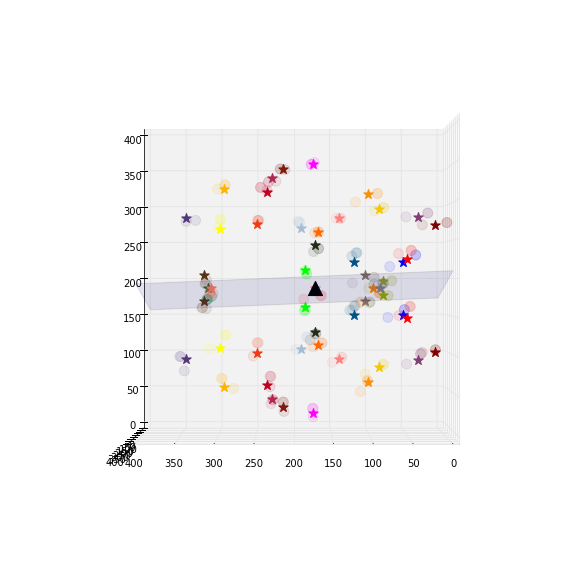

In [184]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for name_s, centroids in instance_centroids_rel2fixed.iteritems():
#     if name_s == '7N_L' or name_s == '7N_R':
    centroids2 = np.array(centroids)
    ax.scatter(centroids2[:,0], centroids2[:,1], centroids2[:,2], 
               color=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
               marker='o', s=100, alpha=.1)
    
    c = canonical_locations_rel2fixed[name_s]
    ax.scatter(c[0], c[1], c[2], 
               color=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., marker='*', s=100)
    
ax.scatter(canonical_centroid_rel2fixed[0], canonical_centroid_rel2fixed[1], canonical_centroid_rel2fixed[2], 
           color=(0,0,0), marker='^', s=200)

ax.plot_surface(canonical_midplane_xx, canonical_midplane_yy, canonical_midplane_z, alpha=.1)

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# ax.set_axis_off()
ax.set_xlim3d([0, 400]);
ax.set_ylim3d([0, 400]);
ax.set_zlim3d([0, 400]);
# ax.view_init(azim = 90 + 20,elev = 0 - 20)
ax.view_init(azim = 90,elev = 0)
plt.legend()
plt.show()

In [129]:
np.savetxt(DataManager.get_atlas_canonical_centroid_filepath(atlas_name=atlas_name), canonical_centroid_rel2uncropped)
np.savetxt(DataManager.get_atlas_canonical_normal_filepath(atlas_name=atlas_name), canonical_normal)
save_pickle(canonical_locations_rel2canon, DataManager.get_structure_mean_positions_filepath(atlas_name=atlas_name))

# Compute mean shapes

In [ ]:
stack_fixed = 'MD589'
stacks_moving = ['MD585', 'MD594']
warp_setting = 9

In [ ]:
instance_volumes = defaultdict(list)
instance_source = defaultdict(list)

moving_vol_aligned2template_inbbox_allInstances_allStructures = defaultdict(list)
moving_vol_aligned2template_bbox_rel2templateCentroid_allInstances_allStructures = defaultdict(list)
scores_allInstances_allStructures = defaultdict(list)
scores_allInstances_allStructures_allLearningRates = defaultdict(lambda: defaultdict(list))

structure_mean_shape_allStructures = {}
structure_origin_rel2templateCentroid_allStructures = {}
structure_mean_mesh_rel2templateCentroid_allStructures = {}

instance_aligned2template_meshes_rel2templateCentroid_allStructures = defaultdict(list)
template_meshes_rel2templateCentroid_allStructures = {}
template_vol_centroids_rel2template_allStructures = {}

# for name_u in ['7N']:
for name_u in all_known_structures:
    print name_u
    
    if name_u in paired_structures:
        lname = convert_to_left_name(name_u)
        rname = convert_to_right_name(name_u)
    else:
        lname = name_u
        rname = name_u
    
    try:
        right_instance_vol = DataManager.load_original_volume(stack=stack_fixed,  downscale=32, volume_type='annotationAsScore', structure=rname)
        right_instance_vol_bbox = np.array(bbox_3d(right_instance_vol))
        right_instance_vol_inbbox = crop_and_pad_volume(right_instance_vol, out_bbox=right_instance_vol_bbox)
        instance_volumes[name_u].append(right_instance_vol_inbbox) # if right, do not mirror
        instance_source[name_u].append((stack_fixed, 'R'))
    except Exception as e:
        continue

    try:
        left_instance_vol = DataManager.load_original_volume(stack=stack_fixed, downscale=32, volume_type='annotationAsScore', structure=lname)
        left_instance_vol_bbox = np.array(bbox_3d(left_instance_vol))
        left_instance_vol_inbbox = crop_and_pad_volume(left_instance_vol, out_bbox=left_instance_vol_bbox)
        instance_volumes[name_u].append(left_instance_vol_inbbox[..., ::-1]) # if left, mirror
        instance_source[name_u].append((stack_fixed, 'L'))
    except:
        continue        

    for stack_moving in stacks_moving:

        try:
            left_instance_vol = DataManager.load_transformed_volume(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                            stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                            warp_setting=warp_setting,
                                                            structure=lname)
            instance_volumes[name_u].append(left_instance_vol[..., ::-1]) # if left, mirror
            instance_source[name_u].append((stack_moving, 'L'))
        except:
            continue

        try:
            right_instance_vol = DataManager.load_transformed_volume(stack_m=stack_moving, vol_type_m='annotationAsScore',
                                                        stack_f=stack_fixed, vol_type_f='annotationAsScore',
                                                        warp_setting=warp_setting,
                                                        structure=rname)
            instance_volumes[name_u].append(right_instance_vol) # if right, do not mirror
            instance_source[name_u].append((stack_moving, 'R'))
        except:
            continue
            
    ############################################
    
    template_vol = instance_volumes[name_u][0]
    
    template_vol_centroid_rel2template = np.mean(np.nonzero(template_vol), axis=1)[[1,0,2]]
    template_vol_centroids_rel2template_allStructures[name_u] = template_vol_centroid_rel2template

    for i in range(1, len(instance_volumes[name_u])):

        moving_vol = instance_volumes[name_u][i]

        aligner = Aligner4({0:template_vol}, {0:moving_vol}, labelIndexMap_m2f={0:0})
        aligner.set_centroid(centroid_m='structure_centroid', centroid_f='structure_centroid')

#         grid_search_T, grid_search_score = aligner.do_grid_search(grid_search_sample_number=5,
#                       std_tx=30, std_ty=30, std_tz=30, std_theta_xy=0,
#                        grid_search_eta=3., stop_radius_voxel=2)
        
        gy, gx, gz = np.gradient(template_vol)
        gradients = {0: np.array([gx, gy, gz])}
        aligner.load_gradient(gradients=gradients)

#         for lr in [.1, 1, 10]:
#             T, scores = aligner.optimize(tf_type='rigid', 
#                                  history_len=50, 
#                                  terminate_thresh=1e-6,
#                                  grad_computation_sample_number=100000,
#                                          full_lr=np.array([lr,lr,lr,0.1,0.1,0.1]),
#     #                                      init_T=grid_search_T
#                                 )

#             scores_allInstances_allStructures_allLearningRates[lr][name_u].append(scores)

        lr = 1.
        T, scores = aligner.optimize(tf_type='rigid', 
                             history_len=50, 
                             terminate_thresh=1e-6,
                            max_iter_num=100 if name_u in ['SC', 'IC'] else 1000,
                             grad_computation_sample_number=None,
                                full_lr=np.array([lr,lr,lr,0.1,0.1,0.1]),
#                                      init_T=grid_search_T
                            )

        scores_allInstances_allStructures[name_u].append(scores)
        
        #################################
        
        moving_vol_aligned2template_inbbox, moving_vol_aligned2template_bbox_rel2template = transform_volume_v2(moving_vol, T, 
                                                                              centroid_m=aligner.centroid_m,
                                                                             centroid_f=aligner.centroid_f)

        moving_vol_aligned2template_bbox_rel2templateCentroid = \
        np.array(moving_vol_aligned2template_bbox_rel2template) - template_vol_centroid_rel2template[[0,0,1,1,2,2]]
        
        moving_vol_aligned2template_inbbox_allInstances_allStructures[name_u].append(moving_vol_aligned2template_inbbox)
        moving_vol_aligned2template_bbox_rel2templateCentroid_allInstances_allStructures[name_u].append(moving_vol_aligned2template_bbox_rel2templateCentroid)  
    
    ########################################

#     fig, axes = plt.subplots(1, 5, figsize=(20,2))
#     for i, scores in enumerate(scores_allInstances_allStructures[name_u]):
#         axes[i].plot(scores)
#         axes[i].set_title('%s, %s, %s, %f' % ((name_u,) + instance_source[name_u][i+1] + (np.max(scores),)))
#     plt.show();
    
    #########################################

    for moving_vol_aligned2template, moving_vol_aligned2template_bbox_rel2templateCentroid in \
    zip(moving_vol_aligned2template_inbbox_allInstances_allStructures[name_u], 
        moving_vol_aligned2template_bbox_rel2templateCentroid_allInstances_allStructures[name_u]):
        instance_aligned2template_mesh_rel2templateCentroid = volume_to_polydata(moving_vol_aligned2template, \
                                                            origin=np.array(moving_vol_aligned2template_bbox_rel2templateCentroid)[[0,2,4]], 
                           num_simplify_iter=3, smooth=True)
        instance_aligned2template_meshes_rel2templateCentroid_allStructures[name_u].append(instance_aligned2template_mesh_rel2templateCentroid)

    template_meshes_rel2templateCentroid_allStructures[name_u] = volume_to_polydata(template_vol, num_simplify_iter=3, smooth=True, origin=-template_vol_centroid_rel2template)
    
#     launch_vtk([actor_mesh(mesh, wireframe=True, color=np.array(high_contrast_colors[i+1])/255., opacity=1) 
#     for i, mesh in enumerate([template_mesh] + instance_aligned2template_meshes_allStructures[name_u])], 
#           background_color=(1,1,1))
    
    ##########################################
    # Save instances data
    
    for s, instance_aligned2template_meshes_rel2templateCentroid in instance_aligned2template_meshes_rel2templateCentroid_allStructures.iteritems():

        fp = DataManager.get_instance_mesh_filepath(atlas_name=atlas_name, structure=s, index=0)
        create_parent_dir_if_not_exists(fp)
        save_mesh_stl(template_meshes_rel2templateCentroid_allStructures[s], fp)
        upload_to_s3(fp)
        
        for i, m in enumerate(instance_aligned2template_meshes_rel2templateCentroid):
            fp = DataManager.get_instance_mesh_filepath(atlas_name=atlas_name, structure=s, index=i+1)
            save_mesh_stl(m, fp)
            upload_to_s3(fp)
            
        fp = DataManager.get_instance_sources_filepath(atlas_name=atlas_name, structure=s)
        create_parent_dir_if_not_exists(fp)
        save_pickle(instance_source[s], fp)
        upload_to_s3(fp)        
    
    #########################################
    
    if name_u == 'IC' or name_u == 'SC':
        # IC and SC boundaries are particularly jagged, so do a larger value smoothing.
        sigma = 5.
    else:
        sigma = 2.

    structure_mean_shape, structure_origin_rel2templateCentroid, structure_mean_mesh_rel2templateCentroid = \
        average_shape(volume_list=moving_vol_aligned2template_inbbox_allInstances_allStructures[name_u], \
                      origin_list=[(b_rel2templateCentroid[0], b_rel2templateCentroid[2], b_rel2templateCentroid[4])
                                   for b_rel2templateCentroid in moving_vol_aligned2template_bbox_rel2templateCentroid_allInstances_allStructures[name_u]],
                      consensus_percentage=.5,
                      num_simplify_iter=3, smooth=True,
                      force_symmetric=(name_u in singular_structures), 
                      sigma=sigma)
    
    structure_mean_shape_allStructures[name_u] = structure_mean_shape
#     structure_origin_rel2template_allStructures[name_u] = structure_origin_rel2template    
#     structure_mean_mesh_rel2template_allStructures[name_u] = structure_mean_mesh_rel2template
    structure_origin_rel2templateCentroid_allStructures[name_u] = structure_origin_rel2templateCentroid    
    structure_mean_mesh_rel2templateCentroid_allStructures[name_u] = structure_mean_mesh_rel2templateCentroid
    
    ########################################
    # Save mean shape data
    
    fp = DataManager.get_structure_mean_mesh_filepath(atlas_name=atlas_name, structure=name_u)
    create_parent_dir_if_not_exists(fp)
    save_mesh_stl(structure_mean_mesh_rel2templateCentroid, fp)
    upload_to_s3(fp)
    
    fp = DataManager.get_structure_mean_shape_filepath(atlas_name=atlas_name, structure=name_u)
    bp.pack_ndarray_file(structure_mean_shape, fp)
    upload_to_s3(fp)
    
    fp = DataManager.get_structure_mean_shape_origin_filepath(atlas_name=atlas_name, structure=name_u)
    np.savetxt(fp, structure_origin_rel2templateCentroid)
    upload_to_s3(fp)
    
    ##########################################
    
#     launch_vtk([
#     actor_mesh(structure_mean_mesh_rel2template_allStructures[name_u], wireframe=True, opacity=1., color=(1,0,0)),
#     actor_volume(structure_mean_shape_allStructures[name_u].astype(np.float32), what='probability',
#                 origin=structure_origin_rel2template_allStructures[name_u], c=(0,1,0)),
# ], background_color=(0,0,0))

    ######################################
    
instance_volumes.default_factory = None
instance_source.default_factory = None
moving_vol_aligned2template_inbbox_allInstances_allStructures.default_factory = None
moving_vol_aligned2template_bbox_rel2templateCentroid_allInstances_allStructures.default_factory = None
scores_allInstances_allStructures.default_factory = None
scores_allInstances_allStructures_allLearningRates.default_factory = None
instance_aligned2template_meshes_rel2templateCentroid_allStructures.default_factory = None

In [ ]:
for structure, scores_allInstances in scores_allInstances_allStructures.iteritems():
    fig, axes = plt.subplots(1, 5, figsize=(20,2))
    for i, scores in enumerate(scores_allInstances):
        axes[i].plot(scores)
        axes[i].set_title('%s, %s, %s, %f' % ((name_u,) + instance_source[name_u][i+1] + (np.max(scores),)))
plt.show()

In [ ]:
launch_vtk([
#     actor_mesh(structure_mean_mesh_rel2template_allStructures[name_u], wireframe=True, opacity=1., color=(1,0,0)),
    actor_volume(structure_mean_shape_allStructures[name_u].astype(np.float32), what='probability',
                origin=structure_origin_rel2templateCentroid_allStructures[name_u], c=(0,1,0)),
] + \
    [actor_mesh(mesh, wireframe=True, color=np.array(high_contrast_colors[i+1])/255., opacity=1) 
for i, mesh in enumerate([template_meshes_rel2templateCentroid_allStructures[name_u]] + \
                         instance_aligned2template_meshes_rel2templateCentroid_allStructures[name_u])] + \
    [actor_sphere((0,0,0), radius=1, color=(0,0,0))], 
    background_color=(0,0,0))

In [ ]:
# viz

In [ ]:
# instance_colors = [(1,0,0),(0,1,0),(0,0,1),(1,1,0),(0,1,1),(1,0,1)] # assume each structure has at most 6 instances.

# for structure in all_known_structures_sided:
# # for structure in ['IC']:

#     print structure
    
#     for direction in ['coronal', 'sagittal', 'horizontal']:

#         # Show each instance separately
#         for i, polydata in enumerate([structure]):
#             instance_actors = actor_mesh(polydata, instance_colors[i], opacity=1, wireframe=False)

#             fp = DataManager.get_structure_viz_filepath(atlas_name=atlas_name, 
#                                                         structure=structure, suffix=direction+'_'+str(i))
#             create_parent_dir_if_not_exists(fp)
#             launch_vtk([instance_actors], snapshot_fn=fp, interactive=False, init_angle=direction)

#         # Show different instances shown aligned together
#         instance_actors = [actor_mesh(polydata, instance_colors[i], opacity=1., wireframe=True) 
#                            for i, polydata in enumerate(polydata_list_allLandmarks[structure])]

#         icp_fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
#                                                          structure=structure, suffix=direction+'_icpAligned')
#         launch_vtk(instance_actors, snapshot_fn=icp_fp, interactive=False, init_angle=direction)
# #         launch_vtk(instance_actors, init_angle=direction)
        
#         # Show voxel-voted probabilistic shape
#         prob_shape_actor = actor_volume(prob_shape_allLandmarks[structure].astype(np.float32), 
#                                         what='probability', origin=prob_shape_origin_allLandmarks[structure])

#         prob_shape_fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
#                                                          structure=structure, suffix=direction+'_probShape')
#         launch_vtk([prob_shape_actor], snapshot_fn=prob_shape_fp, interactive=False, init_angle=direction)
# #         launch_vtk([prob_shape_actor], init_angle=direction)

#         # Show voxel-voted probabilistic shape, thresholded at .5
#         actor = actor_mesh(average_polydata_allLandmarks[structure], [1,1,1], opacity=1, wireframe=True)
        
#         thresh_shape_fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
#                                                                 structure=structure, suffix=direction+'_thresh0.5')
#         launch_vtk([actor], snapshot_fn=thresh_shape_fp, interactive=False, init_angle=direction)
# #         launch_vtk([actor], init_angle=direction)

# Load all necessary data

In [5]:
# Load canonical info

canonical_locations_rel2canon = load_pickle(DataManager.get_structure_mean_positions_filepath(atlas_name=atlas_name))
canonical_centroid_rel2uncropped = np.loadtxt(DataManager.get_atlas_canonical_centroid_filepath(atlas_name=atlas_name))

In [12]:
structure_volumes_rel2canon = {}
structure_meshes_rel2canon = {}

for name_s in canonical_locations_rel2canon.keys():
    
    name_u = convert_to_original_name(name_s)
    
    prob_shape = bp.unpack_ndarray_file(DataManager.get_structure_mean_shape_filepath(atlas_name=atlas_name, structure=name_u))
    prob_shape_origin_rel2structCentroid = np.loadtxt(DataManager.get_structure_mean_shape_origin_filepath(atlas_name=atlas_name, structure=name_u))
    
    vertices_rel2structCentroid, faces = load_mesh_stl(DataManager.get_structure_mean_mesh_filepath(atlas_name=atlas_name, structure=name_u))

    structure_centroid_rel2canon = canonical_locations_rel2canon[name_s]
    
    if name_s in singular_structures or parse_label(name_s)[1] == 'R':
        # Singular or Right - don't need mirroring
        structure_volumes_rel2canon[name_s] = (prob_shape, structure_centroid_rel2canon + prob_shape_origin_rel2structCentroid)
        structure_meshes_rel2canon[name_s] = mesh_to_polydata(vertices=vertices_rel2structCentroid + structure_centroid_rel2canon, 
                                                                faces=faces)
    else:
        # Left - need mirroring
        structure_volumes_rel2canon[name_s] = mirror_volume(prob_shape, structure_centroid_rel2canon + prob_shape_origin_rel2structCentroid*(1,1,-1))
        structure_meshes_rel2canon[name_s] = mesh_to_polydata(vertices=vertices_rel2structCentroid*(1,1,-1) + structure_centroid_rel2canon, 
                                                                faces=faces)

In [8]:
# Save structure meshes with respect to canonical centroid.

# for name_s, mesh_rel2canon in structure_meshes_rel2canon.iteritems():
#     fp = DataManager.get_mesh_filepath(stack_m=atlas_name, structure=name_s)
#     create_parent_dir_if_not_exists(fp)
#     save_mesh_stl(mesh_rel2canon, fp)
#     upload_to_s3(fp)

# Generate full-brain atlas volume

In [13]:
atlas_volumes, atlas_volume_bbox_rel2canon = \
convert_vol_bbox_dict_to_overall_vol(vol_origin_dict=structure_volumes_rel2canon)

In [14]:
atlas_volumes = {k: v.astype(np.float16) for k, v in atlas_volumes.iteritems()}

In [15]:
atlas_volume_bbox_rel2uncropped = atlas_volume_bbox_rel2canon + canonical_centroid_rel2uncropped[[0,0,1,1,2,2]]
print 'atlas_volume_bbox_rel2uncropped:', atlas_volume_bbox_rel2uncropped

atlas_volume_bbox_rel2uncropped: [  606.24715421  1033.23689675   151.74948279   508.07431144   127.52975177
   501.95086665]


In [92]:
# Save full-brain atlas volumes.

for name_s, vol in atlas_volumes.iteritems():
    vol_fp = DataManager.get_volume_filepath(stack_m=atlas_name, structure=name_s)
    create_parent_dir_if_not_exists(vol_fp)
    bp.pack_ndarray_file(vol, vol_fp)
    upload_to_s3(vol_fp)
    
    # Save atlas score volume bbox txt.
    fp = DataManager.get_original_volume_bbox_filepath(stack=atlas_name, structure=name_s)
    np.savetxt(fp, atlas_volume_bbox_rel2uncropped[None,:], fmt='%d')
    upload_to_s3(fp)
    # This is wrt aligned uncropped volume

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5C_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5C_L.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5C_L_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_s

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_R_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_R_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5O_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5O_L.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5O_L_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5O_L_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_RMC_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_d

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_IC.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_IC.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_IC_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_IC_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_VCA_R.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_VCA_R.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_VCA_R_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_VCA_

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_VCP_L_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_VCP_L_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Amb_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Amb_L.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Amb_L_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Amb_L_bbox.txt"


## Surround

In [18]:
# Generate and save surround score volumes. (in fact binary, but dtype is np.float16, same as interior score volumes.)

valid_level = .5

surround_distance_um = 200
surround_distance_voxel = surround_distance_um / XY_PIXEL_DISTANCE_TB
print "surround size (in voxels):", surround_distance_voxel

surround size (in voxels): 13.5869565217


In [93]:
for name_s, vol in atlas_volumes.iteritems():
    
    if name_s in singular_structures:
        vol = symmetricalize_volume(vol)

    surround_vol = get_surround_volume(vol, valid_level=valid_level, distance=surround_distance_voxel, prob=True)
    vol_fp = DataManager.get_volume_filepath(stack_m=atlas_name, 
                                             structure=convert_to_surround_name(name_s, margin=surround_distance_um))
    create_parent_dir_if_not_exists(vol_fp)
    bp.pack_ndarray_file(surround_vol.astype(np.float16), vol_fp)
    upload_to_s3(vol_fp)

    fp = DataManager.get_original_volume_bbox_filepath(stack=atlas_name, structure=convert_to_surround_name(name_s, margin=surround_distance_um))
    np.savetxt(fp, atlas_volume_bbox_rel2uncropped[None,:], fmt='%d')
    upload_to_s3(fp)

surround size (in voxels): 13.5869565217
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R_surround_200.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LRt_R_surround_200_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5C_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5C_L_surround_200.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_L_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_L_surround_200_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_12N_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_12N_surround_200.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_12N_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_12N_surround_200_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_SNR_R_surround_200.bp" "s3://mousebrainatl

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_5N_R_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_5N_R_surround_200_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5I_R_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5I_R_surround_200.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5I_R_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_Sp5I_R_surround_200_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_3N_R_surround_200.bp" "s3://mous

aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_7n_L_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_7n_L_surround_200_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_4N_L_surround_200.bp" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_4N_L_surround_200.bp"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_4N_L_surround_200_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_4N_L_surround_200_bbox.txt"
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_LC_L_surround_200.bp" "s3://mousebrainat

In [ ]:
# surround_vol = get_surround_volume(atlas_prob_volume_allLandmarks['IC'], distance=13, valid_level=0.5, prob=True)
# display_volume_sections(surround_vol, direction='x', vmin=0, vmax=1.)

## Convert surround volumes to meshes, for visualization.

In [59]:
structure_meshes_surround_rel2canon = {}

for name_s in all_known_structures_sided:
# for name_s in ['7N_L']:
    
    try:
        surr_name = convert_to_surround_name(name_s, margin=surround_distance_um)
        surround_vol = DataManager.load_original_volume(stack=atlas_name, structure=surr_name, downscale=32)
        
#         if name_s in singular_structures:
#             surround_vol = symmetricalize_volume(surround_vol)
        
        surround_vol_bbox_rel2atlas = np.array(bbox_3d(surround_vol))
        surround_vol_inbbox = crop_and_pad_volume(surround_vol, out_bbox=surround_vol_bbox_rel2atlas)

        polydata_rel2canon = \
        volume_to_polydata(surround_vol_inbbox, 
                           origin=(surround_vol_bbox_rel2atlas[[0,2,4]]+atlas_volume_bbox_rel2uncropped[[0,2,4]]-canonical_centroid_rel2uncropped),
                           num_simplify_iter=3, smooth=True)
        
        structure_meshes_surround_rel2canon[name_s] = polydata_rel2canon
        
        mesh_fp = DataManager.get_mesh_filepath(stack_m=atlas_name, structure=surr_name)
        save_mesh(polydata_rel2canon, mesh_fp)
        upload_to_s3(mesh_fp)
    
    except Exception as e:
        sys.stderr.write('Error generating mesh for %s : %s\n' % (name_s, str(e)))        

marching cube: 0.04 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24414: 0.21 seconds
simplify 1 @ 4886: 0.24 seconds
simplify 2 @ 980: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_5N_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_5N_L_surround_200.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24416: 0.23 seconds
simplify 1 @ 4886: 0.21 seconds
simplify 2 @ 980: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_5N_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_5N_R_surround_200.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6787: 0.06 seconds
simplify 1 @ 1360: 0.05 seconds
simplify 2 @ 275: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_6N_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_6N_L_surround_200.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6778: 0.05 seconds
simplify 1 @ 1358: 0.05 seconds
simplify 2 @ 274: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_6N_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_6N_R_surround_200.stl"


marching cube: 0.07 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35262: 0.33 seconds
simplify 1 @ 7055: 0.38 seconds
simplify 2 @ 1414: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7N_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7N_L_surround_200.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 35180: 0.31 seconds
simplify 1 @ 7039: 0.35 seconds
simplify 2 @ 1410: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7N_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7N_R_surround_200.stl"


marching cube: 0.24 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 34712: 0.53 seconds
simplify 1 @ 6945: 0.64 seconds
simplify 2 @ 1392: 0.14 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7n_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7n_L_surround_200.stl"


marching cube: 0.14 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 34650: 0.32 seconds
simplify 1 @ 6933: 0.38 seconds
simplify 2 @ 1389: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7n_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_7n_R_surround_200.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7592: 0.07 seconds
simplify 1 @ 1521: 0.06 seconds
simplify 2 @ 307: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Amb_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Amb_L_surround_200.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7580: 0.07 seconds
simplify 1 @ 1519: 0.06 seconds
simplify 2 @ 307: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Amb_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Amb_R_surround_200.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16381: 0.15 seconds
simplify 1 @ 3279: 0.14 seconds
simplify 2 @ 659: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LC_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LC_L_surround_200.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 16367: 0.15 seconds
simplify 1 @ 3276: 0.14 seconds
simplify 2 @ 658: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LC_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LC_R_surround_200.stl"


marching cube: 0.07 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 31178: 0.27 seconds
simplify 1 @ 6238: 0.28 seconds
simplify 2 @ 1250: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LRt_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LRt_L_surround_200.stl"


marching cube: 0.07 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 31336: 0.27 seconds
simplify 1 @ 6270: 0.28 seconds
simplify 2 @ 1257: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LRt_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_LRt_R_surround_200.stl"


marching cube: 0.10 seconds
mesh_to_polydata: 0.06 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Pn_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Pn_L_surround_200.stl"


simplify 0 @ 47478: 0.44 seconds
simplify 1 @ 9498: 0.49 seconds
simplify 2 @ 1902: 0.10 seconds
marching cube: 0.09 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 47408: 0.42 seconds
simplify 1 @ 9484: 0.47 seconds
simplify 2 @ 1900: 0.09 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Pn_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Pn_R_surround_200.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 20114: 0.18 seconds
simplify 1 @ 4026: 0.19 seconds
simplify 2 @ 808: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Tz_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Tz_L_surround_200.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20101: 0.17 seconds
simplify 1 @ 4023: 0.16 seconds
simplify 2 @ 807: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Tz_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Tz_R_surround_200.stl"


marching cube: 0.11 seconds
mesh_to_polydata: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VLL_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VLL_L_surround_200.stl"


simplify 0 @ 37951: 0.37 seconds
simplify 1 @ 7593: 0.37 seconds
simplify 2 @ 1521: 0.07 seconds
marching cube: 0.26 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 37990: 0.69 seconds
simplify 1 @ 7601: 0.66 seconds
simplify 2 @ 1523: 0.14 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VLL_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VLL_R_surround_200.stl"


marching cube: 0.05 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 20115: 0.21 seconds
simplify 1 @ 4026: 0.18 seconds
simplify 2 @ 808: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RMC_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RMC_L_surround_200.stl"


marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 20105: 0.18 seconds
simplify 1 @ 4024: 0.17 seconds
simplify 2 @ 808: 0.04 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RMC_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RMC_R_surround_200.stl"


marching cube: 0.06 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25231: 0.18 seconds
simplify 1 @ 5049: 0.22 seconds
simplify 2 @ 1013: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNC_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNC_L_surround_200.stl"


marching cube: 0.06 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25230: 0.19 seconds
simplify 1 @ 5049: 0.23 seconds
simplify 2 @ 1013: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNC_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNC_R_surround_200.stl"


marching cube: 0.17 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 71805: 0.90 seconds
simplify 1 @ 14364: 0.77 seconds
simplify 2 @ 2876: 0.15 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNR_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNR_L_surround_200.stl"


marching cube: 0.17 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 71832: 0.61 seconds
simplify 1 @ 14369: 0.70 seconds
simplify 2 @ 2877: 0.14 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNR_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SNR_R_surround_200.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11809: 0.12 seconds
simplify 1 @ 2365: 0.09 seconds
simplify 2 @ 476: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_3N_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_3N_L_surround_200.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11821: 0.13 seconds
simplify 1 @ 2367: 0.10 seconds
simplify 2 @ 476: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_3N_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_3N_R_surround_200.stl"


marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5698: 0.05 seconds
simplify 1 @ 1142: 0.04 seconds
simplify 2 @ 231: 0.01 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_4N_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_4N_L_surround_200.stl"


marching cube: 0.03 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5682: 0.10 seconds
simplify 1 @ 1139: 0.09 seconds
simplify 2 @ 231: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_4N_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_4N_R_surround_200.stl"


marching cube: 0.15 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 29409: 0.70 seconds
simplify 1 @ 5885: 0.37 seconds
simplify 2 @ 1180: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5I_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5I_L_surround_200.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 29357: 0.38 seconds
simplify 1 @ 5874: 0.32 seconds
simplify 2 @ 1178: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5I_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5I_R_surround_200.stl"


marching cube: 0.17 seconds
mesh_to_polydata: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5O_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5O_L_surround_200.stl"


simplify 0 @ 34304: 0.94 seconds
simplify 1 @ 6864: 0.45 seconds
simplify 2 @ 1376: 0.07 seconds
marching cube: 0.10 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 34354: 0.85 seconds
simplify 1 @ 6874: 0.62 seconds
simplify 2 @ 1378: 0.14 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5O_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5O_R_surround_200.stl"


marching cube: 0.22 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 76023: 0.71 seconds
simplify 1 @ 15207: 0.91 seconds
simplify 2 @ 3044: 0.18 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5C_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5C_L_surround_200.stl"


marching cube: 0.20 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 75974: 0.65 seconds
simplify 1 @ 15198: 0.87 seconds
simplify 2 @ 3042: 0.17 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5C_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_Sp5C_R_surround_200.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11097: 0.08 seconds
simplify 1 @ 2222: 0.08 seconds
simplify 2 @ 447: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_PBG_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_PBG_L_surround_200.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 11112: 0.08 seconds
simplify 1 @ 2225: 0.09 seconds
simplify 2 @ 448: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_PBG_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_PBG_R_surround_200.stl"


marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_L_surround_200.stl"


simplify 0 @ 18861: 0.16 seconds
simplify 1 @ 3775: 0.18 seconds
simplify 2 @ 758: 0.04 seconds
marching cube: 0.04 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18880: 0.14 seconds
simplify 1 @ 3779: 0.16 seconds
simplify 2 @ 759: 0.03 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_10N_R_surround_200.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 38180: 0.34 seconds
simplify 1 @ 7639: 0.36 seconds
simplify 2 @ 1531: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCA_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCA_L_surround_200.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 38185: 0.35 seconds
simplify 1 @ 7640: 0.38 seconds
simplify 2 @ 1531: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCA_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCA_R_surround_200.stl"


marching cube: 0.05 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 25040: 0.21 seconds
simplify 1 @ 5011: 0.23 seconds
simplify 2 @ 1005: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCP_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCP_L_surround_200.stl"


marching cube: 0.06 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 25060: 0.20 seconds
simplify 1 @ 5015: 0.23 seconds
simplify 2 @ 1006: 0.05 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCP_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_VCP_R_surround_200.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 38218: 0.32 seconds
simplify 1 @ 7646: 0.40 seconds
simplify 2 @ 1532: 0.08 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_DC_L_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_DC_L_surround_200.stl"


marching cube: 0.08 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 38165: 0.31 seconds
simplify 1 @ 7636: 0.37 seconds
simplify 2 @ 1530: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_DC_R_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_DC_R_surround_200.stl"


marching cube: 0.02 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12329: 0.11 seconds
simplify 1 @ 2469: 0.10 seconds
simplify 2 @ 497: 0.02 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_AP_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_AP_surround_200.stl"


marching cube: 0.07 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 36974: 0.33 seconds
simplify 1 @ 7398: 0.36 seconds
simplify 2 @ 1482: 0.07 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_12N_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_12N_surround_200.stl"


marching cube: 0.12 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 60925: 0.59 seconds
simplify 1 @ 12188: 0.60 seconds
simplify 2 @ 2440: 0.12 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RtTg_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_RtTg_surround_200.stl"
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_sp5_surround_200.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_sp5_surround_200.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_sp5_surround_200.bp"


File does not exist: /home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_sp5_surround_200.bp
Error generating mesh for sp5 : [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_sp5_surround_200.bp'


rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_outerContour_surround_200.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_outerContour_surround_200.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_outerContour_surround_200.bp"

File does not exist: /home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_outerContour_surround_200.bp
Error generating mesh for outerContour : [Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_outerContour_surround_200.bp'
marching cube: 0.71 seconds
mesh_to_polydata: 0.31 seconds
simplify 0 @ 245527: 2.33 seconds
simplify 1 @ 49108: 3.98 seconds
simplify 2 @ 9824: 1.08 seconds



aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SC_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_SC_surround_200.stl"


marching cube: 0.63 seconds
mesh_to_polydata: 0.26 seconds
simplify 0 @ 195058: 2.45 seconds
simplify 1 @ 39014: 3.19 seconds


aws s3 cp "/home/yuncong/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_IC_surround_200.stl" "s3://mousebrainatlas-data/CSHL_meshes/atlasV5/atlasV5_down32_scoreVolume/atlasV5_down32_scoreVolume_IC_surround_200.stl"


simplify 2 @ 7806: 1.03 seconds


# Load

In [21]:
# Load shell

stack_fixed = 'MD589'
shell_polydata_rel2uncropped = DataManager.load_shell_mesh(stack=stack_fixed, downscale=32)
shell_actor_rel2canon = actor_mesh(shell_polydata_rel2uncropped, (1,1,1), opacity=.15, 
                              wireframe=False, origin=-canonical_centroid_rel2uncropped)

In [22]:
# atlas_volume, structure_to_label, label_to_structure = \
# DataManager.load_original_volume_all_known_structures(stack=atlas_name, sided=True)

In [56]:
structure_mesh_surround_actors_rel2canon = [actor_mesh(polydata, 
#                                                        np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255.,
                                                       np.array((0,0,1)),
                                             wireframe=False, opacity=.5) 
                                   for name_s, polydata in structure_meshes_surround_rel2canon.iteritems()]

In [50]:
structure_mesh_actors_rel2canon = [actor_mesh(polydata, 
#                                               np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255.,
                                              np.array((1,0,0)),
                                             wireframe=True) 
                                   for name_s, polydata in structure_meshes_rel2canon.iteritems()]

In [53]:
structure_volume, structure_origin_rel2canon = structure_volumes_rel2canon['7N_L']

one_structure_volume_actor_rel2canon = actor_volume(structure_volume.astype(np.float32), what='probability', 
                                              origin=structure_origin_rel2canon,
#                                               c=np.array(name_unsided_to_color['7N'])/255.)
                                            c=np.array((1,0,0)))

# Render

In [57]:
launch_vtk(
#     structure_mesh_actors_rel2canon + \
    [one_structure_volume_actor_rel2canon] + \
    structure_mesh_surround_actors_rel2canon + \
           [shell_actor_rel2canon] + [actor_sphere((0,0,0), radius=1)], 
           init_angle='sagittal', 
    background_color=(1,1,1))